# OpenClassRoom Projet 10 Data V2 : OMCFM : détection de faux billets
## 3 : Algorythme de classement bonus

lien vers [notebook d'origine](Barrios_Mathieu_1_Code_022023.ipynb)

## Sommaire :<br>
[KNN](#KNN) <br>
[Naive_baye](#Naive_baye)<br>

In [1]:
#importation des bibliotheques
import pandas as pd

#bibliotheque graphique
import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump, load

#import fichiers perso
import fonctions.perso_classement as perso_classement
import fonctions.perso_pandas as perso_pandas

In [2]:
#parametre au choix
sns.set_theme(style='dark')

In [3]:
#import des ficher csv (Voir analyse et regression dans le notebook d'origine)
data_billets_reg = pd.read_csv("donnee_de_base/billets_bonux.csv")
data_billets = pd.read_csv("donnee_de_base/billets.csv",sep=";")
data_billets = data_billets.dropna()
data_billets_test_exemple = pd.read_csv("donnee_de_base/billets_production.csv",index_col='id')

In [4]:
#liste en brut si on veux juste tester les modeles

#liste_colonne = ['is_genuine',
#                 #'diagonal',
#                 #'height_left',
#                 #'height_right',
#                 'margin_low',
#                 'margin_up',
#                 'length'
#                ]

#lit la liste des colonnes pour les modeles
liste_colonne = perso_pandas.lis_liste(chemin_fichier='model/liste.liste')

In [5]:
display(data_billets.head())

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


<a id=KNN></a>
### Model KNN

Le nombre de voisins choisi automatiquement est de : 13
rapport sur données d'entrainement :


              precision    recall  f1-score   support

       False       0.99      0.98      0.98       372
        True       0.99      1.00      0.99       753

    accuracy                           0.99      1125
   macro avg       0.99      0.99      0.99      1125
weighted avg       0.99      0.99      0.99      1125



rapport sur données de test:


              precision    recall  f1-score   support

       False       0.99      0.98      0.98       128
        True       0.99      1.00      0.99       247

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



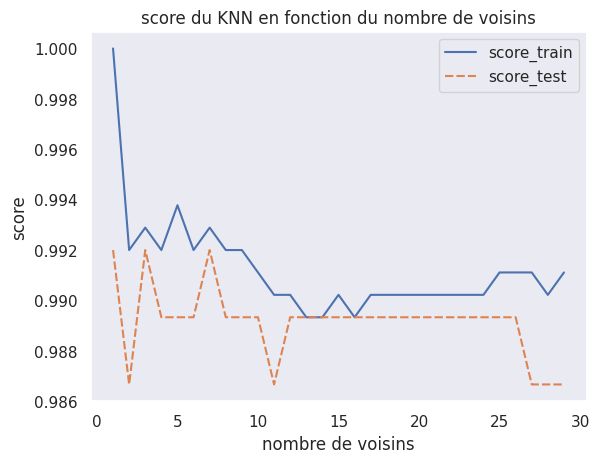

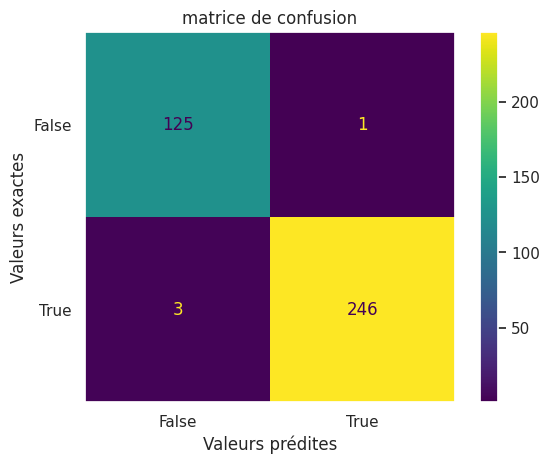

rapport sur données totales
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       128
        True       0.99      1.00      0.99       247

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



['model/KNN_reg.modele']

In [6]:
model_KNN_reg = perso_classement.KNNtest(data_billets_reg[liste_colonne],'is_genuine',kmin=1,kmax=30)
#sauvegarde du modele
dump(model_KNN_reg, 'model/KNN_reg.modele') 

Le nombre de voisins choisi automatiquement est de : 10
rapport sur données d'entrainement :


              precision    recall  f1-score   support

       False       0.99      0.97      0.98       368
        True       0.99      0.99      0.99       729

    accuracy                           0.99      1097
   macro avg       0.99      0.98      0.99      1097
weighted avg       0.99      0.99      0.99      1097



rapport sur données de test:


              precision    recall  f1-score   support

       False       1.00      0.98      0.99       124
        True       0.99      1.00      1.00       242

    accuracy                           0.99       366
   macro avg       1.00      0.99      0.99       366
weighted avg       0.99      0.99      0.99       366



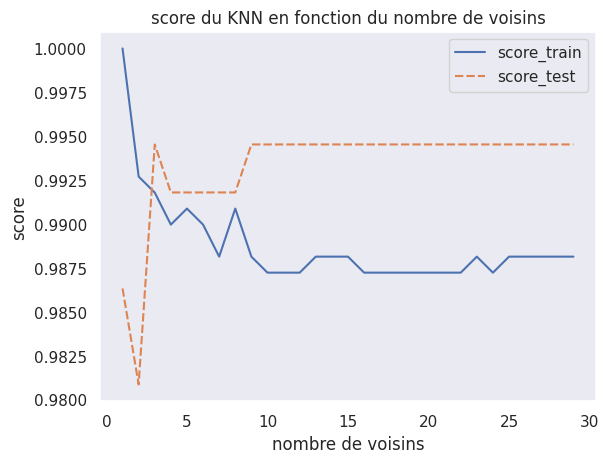

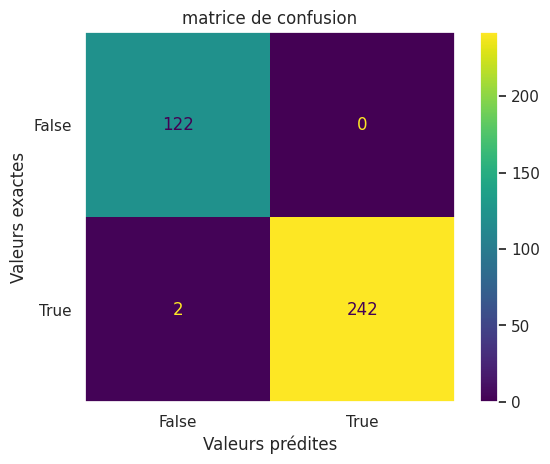

rapport sur données totales
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       124
        True       0.99      1.00      1.00       242

    accuracy                           0.99       366
   macro avg       1.00      0.99      0.99       366
weighted avg       0.99      0.99      0.99       366



['model/KNN.modele']

In [7]:
model_KNN = perso_classement.KNNtest(data_billets[liste_colonne],'is_genuine',kmin=1,kmax=30)
#sauvegarde du modele
dump(model_KNN, 'model/KNN.modele') 

### Application prediction

In [8]:
liste_colonne.remove('is_genuine')

In [9]:
data_billets_test_exemple['predict KNN']= model_KNN.predict(data_billets_test_exemple[liste_colonne])
display(data_billets_test_exemple)

,diagonal,height_left,height_right,margin_low,margin_up,length,predict KNN
id,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True


<a id=Naive_baye></a>
### Naive_baye

In [10]:
#liste en brut si on veux juste tester les modeles

#liste_colonne = ['is_genuine',
#                 #'diagonal',
#                 #'height_left',
#                 #'height_right',
#                 'margin_low',
#                 'margin_up',
#                 'length'
#                ]

#lit la liste des colonnes pour les modeles
liste_colonne = perso_pandas.lis_liste(chemin_fichier='model/liste.liste')

In [11]:
#import des ficher csv (Voir analyse et repgression dans le notebook d'origine)
data_billets_test_exemple = pd.read_csv("donnee_de_base/billets_production.csv",index_col='id')

rapport sur données d'entrainement :


              precision    recall  f1-score   support

       False       1.00      0.98      0.99       365
        True       0.99      1.00      1.00       732

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097



rapport sur données de test:


              precision    recall  f1-score   support

       False       0.98      0.98      0.98       127
        True       0.99      0.99      0.99       239

    accuracy                           0.99       366
   macro avg       0.99      0.99      0.99       366
weighted avg       0.99      0.99      0.99       366



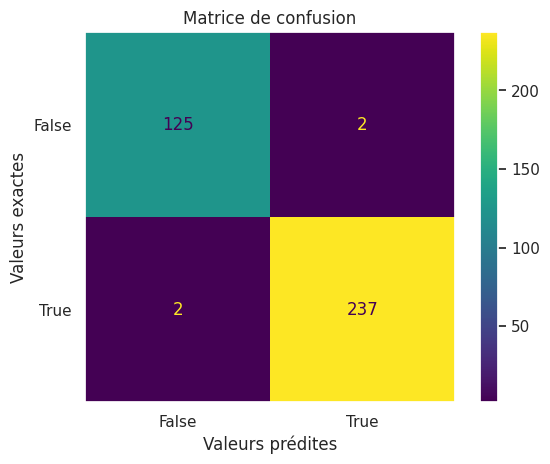

rapport de classification jeu de test
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       127
        True       0.99      0.99      0.99       239

    accuracy                           0.99       366
   macro avg       0.99      0.99      0.99       366
weighted avg       0.99      0.99      0.99       366



['model/gnb.modele']

In [12]:
gnb = perso_classement.naive_bayes_gaussian(data_billets[liste_colonne],'is_genuine')
#sauvegarde du modele
dump(gnb, 'model/gnb.modele') 

rapport sur données d'entrainement :


              precision    recall  f1-score   support

       False       0.99      0.98      0.99       370
        True       0.99      1.00      0.99       727

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097



rapport sur données de test:


              precision    recall  f1-score   support

       False       0.99      0.99      0.99       122
        True       1.00      1.00      1.00       244

    accuracy                           0.99       366
   macro avg       0.99      0.99      0.99       366
weighted avg       0.99      0.99      0.99       366



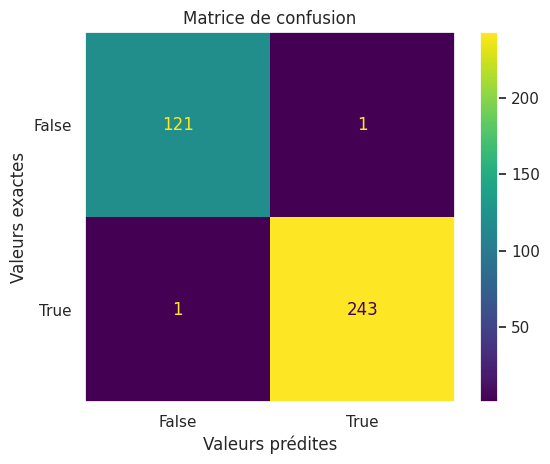

rapport de classification jeu de test
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       122
        True       1.00      1.00      1.00       244

    accuracy                           0.99       366
   macro avg       0.99      0.99      0.99       366
weighted avg       0.99      0.99      0.99       366



['model/gnb_reg.modele']

In [13]:
gnb_reg = perso_classement.naive_bayes_gaussian(data_billets[liste_colonne],'is_genuine')
#sauvegarde du modele
dump(gnb_reg, 'model/gnb_reg.modele') 

### Application prediction

In [14]:
liste_colonne.remove('is_genuine')

In [15]:
data_billets_test_exemple['predict GNB']= gnb.predict(data_billets_test_exemple[liste_colonne])
display(data_billets_test_exemple)

,diagonal,height_left,height_right,margin_low,margin_up,length,predict GNB
id,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True
